In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.manifold import TSNE

In [3]:
df=pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [5]:
# discard all crypto currencied that are not being traded and  drop the 'IsTrading' column from the dataframe.
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
df=df.loc[df['IsTrading']== True,:]

In [7]:
df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [8]:
df=df.drop(['Unnamed: 0','IsTrading'],axis=1)
df.columns

Index(['CoinName', 'Algorithm', 'ProofType', 'TotalCoinsMined',
       'TotalCoinSupply'],
      dtype='object')

In [13]:
# Remove all rows that have at least one null value.
df.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [14]:
df=df.dropna(axis=0,how='any')

In [15]:
df.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [16]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df=df.loc[df['TotalCoinsMined']>0,:]

In [17]:
# delete the CoinName from the original dataframe.
df=df.drop('CoinName',axis=1)

In [18]:
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [19]:
df.shape

(532, 4)

In [20]:
#use Pandas to create dummy variables for categorical columns 
df_encoded=pd.get_dummies(df, drop_first=True) 
df_encoded.columns

Index(['TotalCoinsMined', 'Algorithm_536', 'Algorithm_Argon2d',
       'Algorithm_BLAKE256', 'Algorithm_Blake', 'Algorithm_Blake2S',
       'Algorithm_Blake2b', 'Algorithm_C11', 'Algorithm_Cloverhash',
       'Algorithm_Counterparty',
       ...
       'TotalCoinSupply_91388946', 'TotalCoinSupply_92000000000',
       'TotalCoinSupply_9354000', 'TotalCoinSupply_9507271',
       'TotalCoinSupply_9736000', 'TotalCoinSupply_98000000',
       'TotalCoinSupply_98100000000', 'TotalCoinSupply_990000000000',
       'TotalCoinSupply_999481516', 'TotalCoinSupply_9999999'],
      dtype='object', length=374)

In [167]:
df_encoded.head()

,TotalCoinsMined,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_encoded.shape

(532, 374)

#### Notice: using pandas get_dummies() increase number of columns.

In [84]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
df_scaled=MinMaxScaler().fit_transform(df_encoded)

In [85]:
pca=PCA(n_components=0.9)
df_pca=pca.fit_transform(df_scaled)
df_pca.shape

(532, 187)

In [88]:
tsne=TSNE (learning_rate=100)
tsne_featues=tsne.fit_transform(df_pca)
tsne_featues.shape

(532, 2)

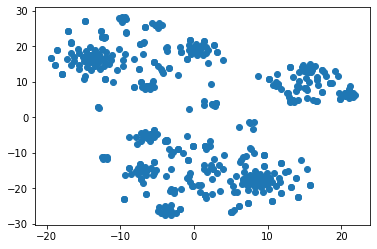

In [89]:
plt.scatter(tsne_featues[:,0],tsne_featues[:,1])
plt.show()

#### 3 clusters can be noticed in TSNE features plot

In [72]:
inertia=[]
k=np.arange(1,11,1)

for i in k:
    km=KMeans(n_clusters=i)
    km.fit(df_pca)
    inertia.append(km.inertia_)

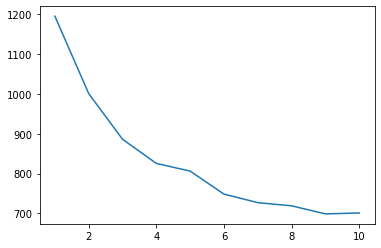

In [73]:
plt.plot(k, inertia)
plt.show()

#### Inertia slows down near K value 4. So based on this model cryptocurrencies can be clustered in  4 main clusters.

##### Trying to serach number of clusters using DBSCAN 

In [97]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.4,min_samples=5)
db.fit(df_pca)
labels=db.labels_
set(labels)

{-1, 0, 1}

#### Notice : DBSCAN can cluster this dataset in 3 main clusters with min_samples=5.

#### Trying to plot dendrogram to check no of possible clusters

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [99]:
# Perform hierarchical clustering
mergings = linkage(df_pca, method='ward')

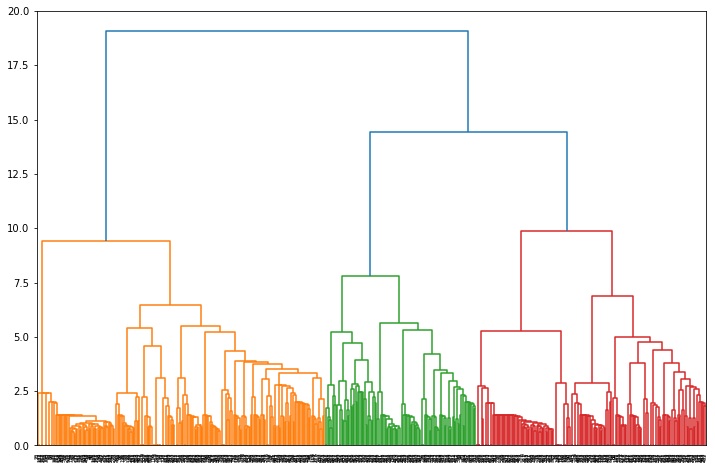

In [100]:
# Generate a dendrogram
plt.figure(figsize=(12,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

#### From dendrogram plot also it is noticed that this dataset can be classified in 3 main clusters.